E: -295.6187264093084
E: -236.203033514
E: -286.935088152
E: -229.02013962
E: -148.734720695


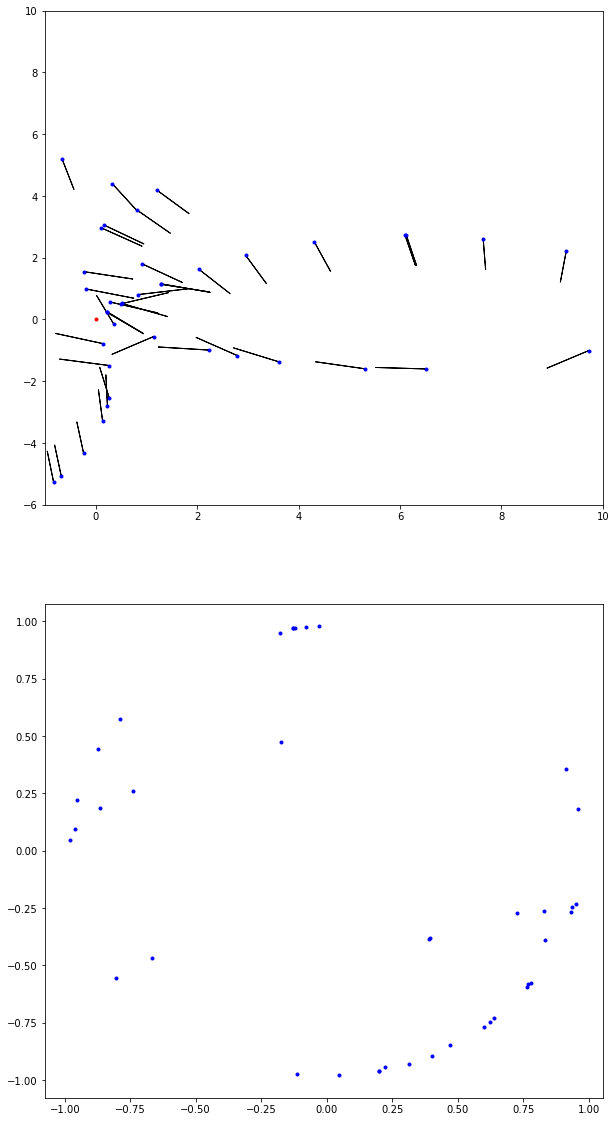

In [124]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
data = [(0.29, 0.562), (0.917, 1.799), (0.813, 3.543), (0.33, 4.39), (-0.66, 5.184), (-0.2, 0.99), (-0.24, 1.549), (0.11, 2.966), (0.16, 3.06), (1.2, 4.194),
       (0.21989799999999998, 0.23319099999999998), (0.23002199999999998, 0.243645), (0.500425, 0.505032), (0.514768, 0.518327), (0.8433459999999999, 0.8059480000000001), (1.27789, 1.1414900000000001), (1.2937299999999998, 1.15282), (6.09883, 2.72416), (6.12293, 2.72787), (2.03429, 1.6247), (2.95577, 2.0769800000000003), (4.31039, 2.50972), (9.275030000000001, 2.2054300000000002), (7.63803, 2.61114),
       (0.15,-0.784), (0.267, -1.491), (0.265,-2.529), (0.232, -2.791), (0.136, -3.273), (-0.83, -5.257), (-0.68, -5.056), (-0.24, -4.311),
       (0.36,-0.158), (1.14, -0.554), (2.23, -0.99), (3.61, -1.37), (5.31, -1.597), (6.52, -1.602), (2.79, -1.167), (9.72, -1.007)]
(-0.05,-0.42)
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y in data:
    d = math.sqrt(x**2 + y**2)
    rotors.append((x/d, y/d))


T = 1
dK = 1
for it in range(5):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        weights = 0
        v1x,v1y = rotors[i1]
        x1,y1 = data[i1]
        ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        ct = 2*ca**2 - 1
        K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2 = data[i2]
            v2x,v2y = rotors[i2]
            
            ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
            ct2 = 2*ca2**2 - 1
            K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))
            
            if abs(K2 - K) < dK:
                
                phi = math.atan2(y2-y1, x2-x1)
                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sx += (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sy += (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
        
        magS = math.sqrt(sx**2 + sy**2)
        newx = sx/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        newy = sy/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    T *= 0.9
    dK*= 0.9

plt.figure(figsize = (10,20))
plt.subplot(211)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-1,10,-6,10])

plt.subplot(212)
plt.plot([x for x,y in rotors], [y for x,y in rotors], 'b.')
plt.show()

#print(data)
#print(rotors)

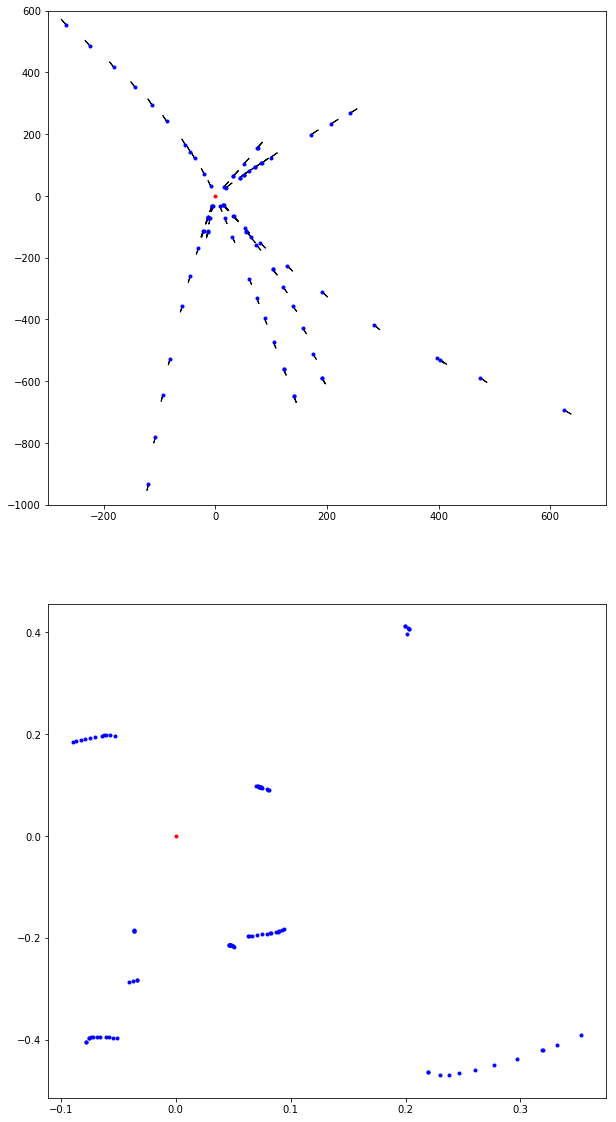

In [12]:
import scipy.special as scipySp
import math
import matplotlib.pyplot as plt
data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#for line in open('rotorTest.csv'):
#    line = line.strip()
#    if line != '' and line != 'x,y':
#        data.append(tuple(float(i) for i in line.split(',')))

#print(data)

rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2 + z**2)
    rotors.append((x/d, y/d, z/d))


T = 10
dK = 100000
numClose = 10
for it in range(0):
    #print(data)
    #print(rotors)
    newRotors = []
    energy = 0
    for i1 in range(len(rotors)):
        sx = 0
        sy = 0
        v1x,v1y = rotors[i1]
        x1,y1 = data[i1]
        ca = (x1*v1x + y1*v1y)/math.sqrt((x1**2+y1**2)*(v1x**2+v1y**2))
        ct = 2*ca**2 - 1
        K = math.sqrt((2/(x1**2+y1**2))*abs(1 - ct))
        for i2 in range(len(rotors)):
            x2,y2 = data[i2]
            v2x,v2y = rotors[i2]
            
            ca2 = (x2*v2x + y2*v2y)/math.sqrt((x2**2+y2**2)*(v2x**2+v2y**2))
            ct2 = 2*ca2**2 - 1
            K2 = math.sqrt((2/(x2**2+y2**2))*abs(1 - ct2))
            
            if abs(K2 - K) < dK:
                
                phi = math.atan2(y2-y1, x2-x1)
                #d2 = (x2 - x1)**2 + (y2 - y1)**2
                #weight = 1#math.exp(-0.01*d2)
                sx += (math.cos(2*phi)*v2x + math.sin(2*phi)*v2y)#*weight
                sy += (math.sin(2*phi)*v2x - math.cos(2*phi)*v2y)#*weight
        
        magS = math.sqrt(sx**2 + sy**2)
        newx = sx/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        newy = sy/magS * scipySp.iv(1, magS/T) / scipySp.iv(0, magS/T)
        
        energy += v1x*sx + v1y*sy
        #newx = math.tanh(sx/T)
        #newy = math.tanh(sy/T)
        #size = math.sqrt(newx**2 + newy**2)
        #effect = 1#math.exp(-0.1 * (x1**2 + y1**2))
        newRotors.append((newx, newy))
    for i in range(len(rotors)):
        rotors[i] = newRotors[i]
    #if it%10 == 0:
    print("E:", energy)
    T *= 0.9
    dK*= 0.5

plt.figure(figsize = (10,20))
plt.subplot(211)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.05
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.plot([0], [0], 'r.')
plt.axis([-300,700,-1000,600])

plt.subplot(212)
plt.plot([x for x,y,z in rotors], [y for x,y,z in rotors], 'b.')
plt.plot([0], [0], 'r.')
plt.show()